In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

In [21]:
df = pd.read_csv(r"C:\Users\Zain Khalid\Desktop\bank.csv")
df.head(8)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


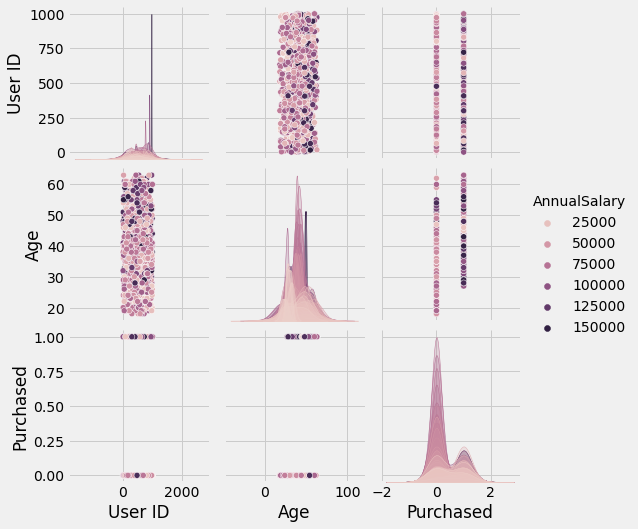

In [13]:
plt.style.use('fivethirtyeight')
sns.pairplot(df, hue = 'class')

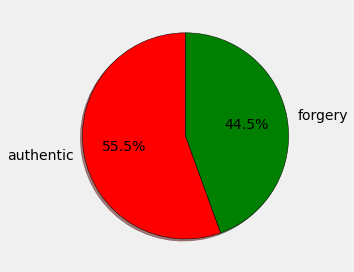

In [28]:
authentic = df[df['class'] == 0].shape[0]
forgery = df[df['class'] == 1].shape[0]

label = [authentic, forgery]
plt.pie(label, labels = ['authentic', 'forgery'], shadow = True, wedgeprops = {'edgecolor': 'black'},
       autopct = '%1.1f%%', startangle = 90, colors = ['red', 'green'])
plt.tight_layout()
plt.show()

In [25]:
X = df.iloc[:, :-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()
print('predictor attribute', X)
print('target attribute', Y)

predictor attribute [[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
target attribute [0 0 0 ... 1 1 1]


In [26]:
df.isnull().sum()  

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [27]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [30]:
print("X_train", X_train.shape)
print("Y_train", y_train.shape)

X_train (1097, 4)
Y_train (1097,)


In [31]:
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (275, 4)
X_test (275,)


In [32]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_idx = np.argsort(distances)[: self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [33]:
knn_scratch = KNN( k = 5)

In [34]:
knn_scratch.fit(X_train, y_train)

In [35]:
Y_predict_scratch = knn_scratch.predict(X_test)
Y_predict_scratch

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [36]:
Accuracy_Scratch = accuracy_score(Y_predict_scratch, y_test)
print('Accuracy Score:', Accuracy_Scratch)

Accuracy Score: 1.0


In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn_Sklearn = KNeighborsClassifier(n_neighbors= 5, metric= 'minkowski', p= 2)


In [39]:
knn_Sklearn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
Y_predict_Sklearn = knn_Sklearn.predict(X_test)
Y_predict_Sklearn

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [41]:
Accuracy_Sklearn = accuracy_score(Y_predict_Sklearn, y_test)
print('Accuracy Score:', Accuracy_Sklearn)

Accuracy Score: 1.0


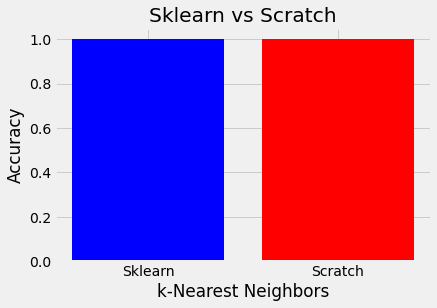

In [42]:
accuracy = [Accuracy_Sklearn, Accuracy_Scratch]
label = ["Sklearn", "Scratch"]
plt.bar(label, accuracy, color = ['blue', 'red'])
plt.title("Sklearn vs Scratch")
plt.xlabel("k-Nearest Neighbors")
plt.ylabel("Accuracy")
plt.show()

<AxesSubplot:>

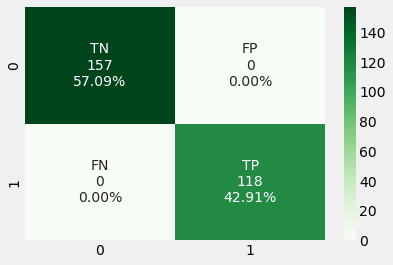

In [43]:
confusion_matrix_Scratch = confusion_matrix(Y_predict_scratch, y_test)

#[row, column]
TP = confusion_matrix_Scratch[1, 1]        
TN = confusion_matrix_Scratch[0, 0]           
FP = confusion_matrix_Scratch[0, 1]           
FN = confusion_matrix_Scratch[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_Scratch.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_Scratch.flatten()/np.sum(confusion_matrix_Scratch)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix_Scratch, annot=labels, fmt='', cmap='Greens')

In [44]:
# Accuracy Score
Accuracy = accuracy_score(Y_predict_scratch, y_test)
print('Accuracy Score:', Accuracy) 

# Precision Score
Precision = precision_score(Y_predict_scratch, y_test)
print('Precision Score:', Precision)   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(Y_predict_scratch, y_test)
print('True positive Rate:', TPR)             

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)                       

# F1 Score or F-Measure or F-Score
F1 = f1_score(Y_predict_scratch, y_test)
print('F1 Score:', F1)                 

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )                    

# Mean Absolute Error
Error = mean_absolute_error(Y_predict_scratch, y_test)
print('Mean Absolute Error:', Error)   

# ROC Area
Roc = roc_auc_score(Y_predict_scratch, y_test)
print('ROC Area:', Roc) 

Accuracy Score: 1.0
Precision Score: 1.0
True positive Rate: 1.0
False positive Rate 0.0
F1 Score: 1.0
Specificity: 1.0
Mean Absolute Error: 0.0
ROC Area: 1.0


<BarContainer object of 8 artists>

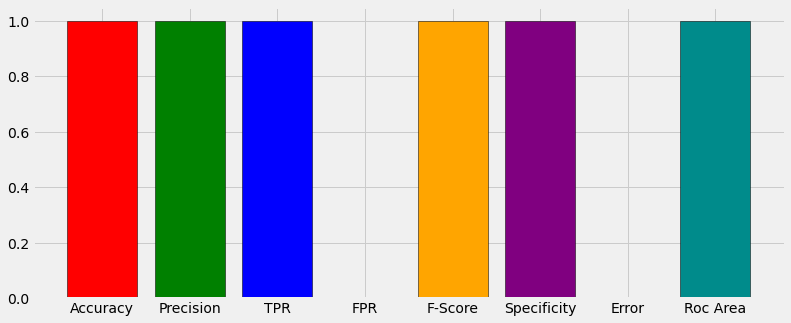

In [45]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error, Roc]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error", "Roc Area"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown', 'darkcyan']

plt.bar(label, result, color = colors, edgecolor='black')

In [46]:
col = ['Variance of Image', 'Skewness', 'Kurtosis', 'Entropy', 'Class']
pd.DataFrame([[3.1111, 8.8282, 4.111, -2.34422, '?']], columns =col)

,Variance of Image,Skewness,Kurtosis,Entropy,Class
0,3.1111,8.8282,4.111,-2.34422,?


In [47]:
new_prediction = knn_scratch.predict(sc_X.transform(np.array([[3.1111, 8.8282, 4.111, -2.34422]])))

In [48]:
if new_prediction == 1:
    print("forgery")
else:
    print("authentic")

authentic
